# Introduction

`Text with this hightlight has been add by Marco Bours`

You will have to import five different datasets. Each one is an exchange traded fund (etf) offered by Vanguard that hold a collection of securities (stocks). You could technically buy one of these and own all the businesses that are part of that etf. Pretty cool.

The composition of each etf is market capitalization weighted. That means that the bigger the company is in terms of market value (think Apple with its trillion dollar market cap), the more of your dollars that you invest in that etf goes to this one stock. That is shown below.

![Large companies dominate...](large-companies-dominate-total-stock-market-index.png)

But you don't want that. What you want is this...

![A more proportional portfolio...](spreading-your-dollars-across-all-size-companies.png)

Let's explore one of those etfs.

In [1]:
import pandas as pd

In [2]:
# Read VTIO
vti=pd.read_csv('vti_12_31_2019.csv')
vti.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
vti.head(10)

,holding,marketValue
0,Microsoft Corp.,3.388885e+10
1,Apple Inc.,3.307893e+10
2,Amazon.com Inc.,2.193640e+10
3,Facebook Inc.,1.391406e+10
4,Berkshire Hathaway Inc.,1.208788e+10
5,JPMorgan Chase & Co.,1.157386e+10
6,Alphabet Inc.,1.129601e+10
7,Alphabet Inc. Class C,1.100778e+10
8,Johnson & Johnson,1.081596e+10
9,Visa Inc.,9.063540e+09


In [3]:
vti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   holding      3550 non-null   object 
 1   marketValue  3550 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.6+ KB


So these are the top ten holdings within this etf. The marketValue column for each holding tells us the amount of money that goes towards that holding if we were to make an investment in this etf. To find % ownership for each holding, you can divide the marketValue for that holding with the total sum of marketValues for all holdings in that etf.

`The sum of marketValue for all holdings:`

In [4]:
vti['marketValue'].sum(axis=0)

894882840379.0

`The marketValue for the Microsoft Corp:`

In [5]:
vti['marketValue'][0]

33888846722.0

`The percentile ownership for Mircosoft Corp:`

In [6]:
vti['marketValue'][0]/vti['marketValue'].sum(axis=0)

0.037869590512706025

`The percentile ownership for Apple Inc.:`

In [7]:
vti['marketValue'][1]/vti['marketValue'].sum(axis=0)

0.03696454191700719

A brief discreption on the etfs...

[VTI](https://investor.vanguard.com/etf/profile/VTI) - Total stock market etf. It technically owns all the publicly traded companies in these United States.

[VO](https://investor.vanguard.com/etf/profile/vo) - Mid-size company etf. It owns companies that are not too larger or small.

[VB](https://investor.vanguard.com/etf/profile/vb) - Small-size company etf. It owns companies that are small in market value.

[VOO](https://investor.vanguard.com/etf/profile/voo) - These are all the companies that are part of the S&P 500 index. This is basically a large cap index and almost all companies within this are also found in VTI.

[VXF](https://investor.vanguard.com/etf/profile/vxf) - These are all the companies that are part of VTI but excluding those that are found in the S&P 500 index. Which means VXF + VOO = VTI.

#### Read all other data sets

In [8]:
# Read VO
vo=pd.read_csv('vo_12_31_2019.csv')
vo.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
df2=vo[0:10]
vo.head()

,holding,marketValue
0,Newmont Goldcorp Corp.,896765462.0
1,Amphenol Corp. Class A,807963791.0
2,ONEOK Inc.,787016807.0
3,WEC Energy Group Inc.,732058286.0
4,IHS Markit Ltd.,722329137.0


In [9]:
vo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   holding      339 non-null    object 
 1   marketValue  339 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


In [10]:
# Read VB
vb=pd.read_csv('vb_12_31_2019.csv')
vb.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
vb.head()

,holding,marketValue
0,Leidos Holdings Inc.,347521932.0
1,Zebra Technologies Corp.,344245760.0
2,Atmos Energy Corp.,334201885.0
3,IDEX Corp.,327868292.0
4,STERIS plc,322979504.0


In [11]:
# Read VOO
voo=pd.read_csv('voo_12_31_2019.csv')
voo.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
voo.head()

,holding,marketValue
0,Apple Inc.,2.450349e+10
1,Microsoft Corp.,2.403557e+10
2,Amazon.com Inc.,1.537491e+10
3,Facebook Inc. Class A,9.868079e+09
4,JPMorgan Chase & Co.,8.651537e+09


In [12]:
# Read VOO
vxf=pd.read_csv('vxf_12_31_2019.csv')
vxf.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
vxf.head()

,holding,marketValue
0,Tesla Inc.,844923272.0
1,Blackstone Group LP,524426088.0
2,Lululemon Athletica Inc.,393325388.0
3,Workday Inc. Class A,359631265.0
4,Palo Alto Networks Inc.,321314013.0


### Question 1

Say you had a 100 dollars to invest and you were to split that equally between these 5 etfs. How will your money be divvied up between the companies within that combined portfolio (hint: use merge in combining datasets). 

- What portion of your money will go to the top 50 companies?
- What portion to the next 450 companies?
- And what to the remaining set of companies?

Visualizations come in handy but are not necessary. Be as creative as possible. There might be overlap in holdings between etfs and you might have to use regular expressions to clean some things out to match holdings.

#### How to takle this problem

`Approach:
Merge all data set based on holding.` 

`Clean:
Remove the columns 'Unnamed:0' and 'date'`

`Check:
Merge 2 data sets with e.g. Apple and see whether the marketValue is merged or a new column? 
Result: There is only one marketValue. 
Resolution: rename vti['marketValie'] to 'vti_marketValue'. When merging the data frames, rename the marketValue to <eft>_marketValue`

`Assumption: 
The company names used the same spelling in all data sets`

In [13]:
# 1 create a copy of vti
df=vti.copy() 
df.rename(columns={"marketValue": "vti_marketValue"}, inplace = True)
df1=df[0:10]
df

,holding,vti_marketValue
0,Microsoft Corp.,3.388885e+10
1,Apple Inc.,3.307893e+10
2,Amazon.com Inc.,2.193640e+10
3,Facebook Inc.,1.391406e+10
4,Berkshire Hathaway Inc.,1.208788e+10
...,...,...
3545,Jones Energy Inc. Class A,8.000000e+00
3546,THESTREET Inc. CVR1,2.000000e+00
3547,Harvest Natural Resources Inc.,1.000000e+00
3548,Universal Travel Group,0.000000e+00


In [14]:
# 2 Merge vti with vo 
df=df.merge(vo, how='outer')
df.rename(columns={"marketValue": "vo_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue
0,Microsoft Corp.,3.388885e+10,NaN
1,Apple Inc.,3.307893e+10,NaN
2,Amazon.com Inc.,2.193640e+10,NaN
3,Facebook Inc.,1.391406e+10,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN
...,...,...,...
3581,Liberty Broadband Corp. Class A,NaN,79723009.0
3582,Hyatt Hotels Corp. Class A,NaN,78324904.0
3583,Carvana Co. Class A,NaN,58196403.0
3584,Lennar Corp. Class B,NaN,9520251.0


In [15]:
# 3 Merge vti, vo  with vb
df=df.merge(vb, how='outer')
df.rename(columns={"marketValue": "vb_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue
0,Microsoft Corp.,3.388885e+10,NaN,NaN
1,Apple Inc.,3.307893e+10,NaN,NaN
2,Amazon.com Inc.,2.193640e+10,NaN,NaN
3,Facebook Inc.,1.391406e+10,NaN,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN,NaN
...,...,...,...,...
3705,Revlon Inc. Class A,NaN,NaN,3375663.0
3706,SecureWorks Corp. Class A,NaN,NaN,3071588.0
3707,Associated Capital Group Inc. Class A,NaN,NaN,2500921.0
3708,Greenlight Capital Re Ltd. Class A,NaN,NaN,2062400.0


In [16]:
# 4 Merge vti, vo, vb with voo
df=df.merge(voo, how='outer')
df.rename(columns={"marketValue": "voo_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue
0,Microsoft Corp.,3.388885e+10,NaN,NaN,2.403557e+10
1,Apple Inc.,3.307893e+10,NaN,NaN,2.450349e+10
2,Amazon.com Inc.,2.193640e+10,NaN,NaN,1.537491e+10
3,Facebook Inc.,1.391406e+10,NaN,NaN,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN,NaN,NaN
...,...,...,...,...,...
3722,Marriott International Inc./MD Class A,NaN,NaN,NaN,8.209544e+08
3723,Cognizant Technology Solutions Corp. Class A,NaN,NaN,NaN,6.784981e+08
3724,LyondellBasell Industries NV Class A,NaN,NaN,NaN,4.845976e+08
3725,Republic Services Inc. Class A,NaN,NaN,NaN,3.771746e+08


In [17]:
# 5 Merge vti, vo, vb, voo with vxf
df=df.merge(vxf, how='outer')
df.rename(columns={"marketValue": "vxf_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue
0,Microsoft Corp.,3.388885e+10,NaN,NaN,2.403557e+10,NaN
1,Apple Inc.,3.307893e+10,NaN,NaN,2.450349e+10,NaN
2,Amazon.com Inc.,2.193640e+10,NaN,NaN,1.537491e+10,NaN
3,Facebook Inc.,1.391406e+10,NaN,NaN,NaN,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4076,Nephros Inc.,NaN,NaN,NaN,NaN,995.0
4077,Priority Technology Holdings Inc.,NaN,NaN,NaN,NaN,260.0
4078,Cohen & Co. Inc.,NaN,NaN,NaN,NaN,253.0
4079,InnSuites Hospitality Trust,NaN,NaN,NaN,NaN,165.0


In [18]:
# Replace NaN with 0.0
df['vti_marketValue']=df['vti_marketValue'].fillna(0.0)
df['vo_marketValue']=df['vo_marketValue'].fillna(0.0)
df['vb_marketValue']=df['vb_marketValue'].fillna(0.0)
df['voo_marketValue']=df['voo_marketValue'].fillna(0.0)
df['vxf_marketValue']=df['vxf_marketValue'].fillna(0.0)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue
0,Microsoft Corp.,3.388885e+10,0.0,0.0,2.403557e+10,0.0
1,Apple Inc.,3.307893e+10,0.0,0.0,2.450349e+10,0.0
2,Amazon.com Inc.,2.193640e+10,0.0,0.0,1.537491e+10,0.0
3,Facebook Inc.,1.391406e+10,0.0,0.0,0.000000e+00,0.0
4,Berkshire Hathaway Inc.,1.208788e+10,0.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...
4076,Nephros Inc.,0.000000e+00,0.0,0.0,0.000000e+00,995.0
4077,Priority Technology Holdings Inc.,0.000000e+00,0.0,0.0,0.000000e+00,260.0
4078,Cohen & Co. Inc.,0.000000e+00,0.0,0.0,0.000000e+00,253.0
4079,InnSuites Hospitality Trust,0.000000e+00,0.0,0.0,0.000000e+00,165.0


In [19]:
# Create variables with the sum of the marketValue for each ETF
vti_sum=df['vti_marketValue'].sum(axis=0)
vo_sum= df['vo_marketValue' ].sum(axis=0)
vb_sum= df['vb_marketValue' ].sum(axis=0)
voo_sum=df['voo_marketValue'].sum(axis=0)
vxf_sum=df['vxf_marketValue'].sum(axis=0)
print(vti_sum, vo_sum, vb_sum, voo_sum, vxf_sum)

894921837109.0 112085497901.0 96282006366.0 534569680623.0 74361707404.0


`Calculate the percentile of the first entry for all ETF`

In [20]:
df['vti_marketValue'][0]/(vti_sum)

0.037867940323678115

In [21]:
df['vo_marketValue'][0]/(vo_sum)

0.0

In [22]:
df['vb_marketValue'][0]/(vb_sum)

0.0

In [23]:
df['voo_marketValue'][0]/(voo_sum)

0.04496247103836563

In [24]:
df['vxf_marketValue'][0]/(vxf_sum)

0.0

`Calculate the total market share for all ETF combined (1/5 for each summand)`

In [25]:
df['vti_marketValue'][0]/(5*vti_sum) + df['vo_marketValue'][0]/(5*vo_sum) + df['vb_marketValue'][0]/(5*vb_sum) + df['voo_marketValue'][0]/(5*voo_sum) + df['vxf_marketValue'][0]/(5*vxf_sum)

0.016566082272408748

`Calculate the total market share for all ETF combined (add each summand and divide the sum by 5)`

In [26]:
(df['vti_marketValue'][0]/(vti_sum) + df['vo_marketValue'][0]/(vo_sum) + df['vb_marketValue'][0]/(vb_sum) + df['voo_marketValue'][0]/(voo_sum) + df['vxf_marketValue'][0]/(vxf_sum))/5

0.01656608227240875

In [27]:
# Create a new columns with the % of the total column value
df['vti_share']=df['vti_marketValue']/vti_sum
df['vo_share'] =df['vo_marketValue']/vo_sum
df['vb_share'] =df['vb_marketValue']/vb_sum
df['voo_share']=df['voo_marketValue']/voo_sum
df['vxf_share']=df['vxf_marketValue']/vxf_sum
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue,vti_share,vo_share,vb_share,voo_share,vxf_share
0,Microsoft Corp.,3.388885e+10,0.0,0.0,2.403557e+10,0.0,0.037868,0.0,0.0,0.044962,0.000000e+00
1,Apple Inc.,3.307893e+10,0.0,0.0,2.450349e+10,0.0,0.036963,0.0,0.0,0.045838,0.000000e+00
2,Amazon.com Inc.,2.193640e+10,0.0,0.0,1.537491e+10,0.0,0.024512,0.0,0.0,0.028761,0.000000e+00
3,Facebook Inc.,1.391406e+10,0.0,0.0,0.000000e+00,0.0,0.015548,0.0,0.0,0.000000,0.000000e+00
4,Berkshire Hathaway Inc.,1.208788e+10,0.0,0.0,0.000000e+00,0.0,0.013507,0.0,0.0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
4076,Nephros Inc.,0.000000e+00,0.0,0.0,0.000000e+00,995.0,0.000000,0.0,0.0,0.000000,1.338054e-08
4077,Priority Technology Holdings Inc.,0.000000e+00,0.0,0.0,0.000000e+00,260.0,0.000000,0.0,0.0,0.000000,3.496423e-09
4078,Cohen & Co. Inc.,0.000000e+00,0.0,0.0,0.000000e+00,253.0,0.000000,0.0,0.0,0.000000,3.402289e-09
4079,InnSuites Hospitality Trust,0.000000e+00,0.0,0.0,0.000000e+00,165.0,0.000000,0.0,0.0,0.000000,2.218884e-09


`Do a calculation of the combined total share for the first entry`

In [28]:
df.iloc[0,:]

holding            Microsoft Corp.
vti_marketValue        3.38888e+10
vo_marketValue                   0
vb_marketValue                   0
voo_marketValue        2.40356e+10
vxf_marketValue                  0
vti_share                0.0378679
vo_share                         0
vb_share                         0
voo_share                0.0449625
vxf_share                        0
Name: 0, dtype: object

In [29]:
# Create a column with the total share
df['total_share'] = (df['vti_share'] + df['vo_share'] + df['vb_share'] + df['voo_share'] + df['vxf_share'])/5
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue,vti_share,vo_share,vb_share,voo_share,vxf_share,total_share
0,Microsoft Corp.,3.388885e+10,0.0,0.0,2.403557e+10,0.0,0.037868,0.0,0.0,0.044962,0.000000e+00,1.656608e-02
1,Apple Inc.,3.307893e+10,0.0,0.0,2.450349e+10,0.0,0.036963,0.0,0.0,0.045838,0.000000e+00,1.656014e-02
2,Amazon.com Inc.,2.193640e+10,0.0,0.0,1.537491e+10,0.0,0.024512,0.0,0.0,0.028761,0.000000e+00,1.065467e-02
3,Facebook Inc.,1.391406e+10,0.0,0.0,0.000000e+00,0.0,0.015548,0.0,0.0,0.000000,0.000000e+00,3.109559e-03
4,Berkshire Hathaway Inc.,1.208788e+10,0.0,0.0,0.000000e+00,0.0,0.013507,0.0,0.0,0.000000,0.000000e+00,2.701438e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
4076,Nephros Inc.,0.000000e+00,0.0,0.0,0.000000e+00,995.0,0.000000,0.0,0.0,0.000000,1.338054e-08,2.676109e-09
4077,Priority Technology Holdings Inc.,0.000000e+00,0.0,0.0,0.000000e+00,260.0,0.000000,0.0,0.0,0.000000,3.496423e-09,6.992846e-10
4078,Cohen & Co. Inc.,0.000000e+00,0.0,0.0,0.000000e+00,253.0,0.000000,0.0,0.0,0.000000,3.402289e-09,6.804577e-10
4079,InnSuites Hospitality Trust,0.000000e+00,0.0,0.0,0.000000e+00,165.0,0.000000,0.0,0.0,0.000000,2.218884e-09,4.437768e-10


In [30]:
# Create a data frame 'short_list' with just holding and total_share. Sort it by total_share inplace. 
short_list=df.loc[:,['holding', 'total_share']]
short_list.sort_values(by = 'total_share', ascending = False, inplace = True)

`Calculate the sum of total share of the first 50 companies - Largcap`

In [31]:
short_list[0:50].sum()

holding        Microsoft Corp.Apple Inc.Amazon.com Inc.JPMorg...
total_share                                             0.179922
dtype: object

`Calculate the sum of total share of the next 450 companies - Midcap`

In [32]:
short_list[50:500].sum()

holding        Advanced Micro Devices Inc.Accenture plc Class...
total_share                                             0.434975
dtype: object

`Calculate the sum of total share of all the companies beyond the first 500`

In [33]:
short_list[500:].sum()

holding        First American Financial Corp.United Parcel Se...
total_share                                             0.385103
dtype: object

In [34]:
# Calculate the largecap, midcap, and smallcap sum of share
# This produces the precentile for each category.
largecap=short_list[0:50]['total_share'].sum()
midcap=short_list[51:500]['total_share'].sum()
smallcap=short_list[501:]['total_share'].sum()
distribution=pd.DataFrame(columns=['Largecap', 'Midcap', 'Smallcap'], index = [0])
distribution.iloc[0,:]=[largecap, midcap, smallcap]
distribution

,Largecap,Midcap,Smallcap
0,0.179922,0.433125,0.384489


`If you buy each of the 5 EFTs with an equal amount of money:`
- `18% is invested in Largecap`
- `43% is invested in Midcap`
- `38% is invested in Smallcap`

#### Question 1 Plotting the result

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
distribution.columns

Index(['Largecap', 'Midcap', 'Smallcap'], dtype='object')

In [37]:
distribution.iloc[0,:].values

array([0.17992194779817133, 0.4331249341696862, 0.3844893615603132],
      dtype=object)

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

#### Plot the distribution as a pie chart

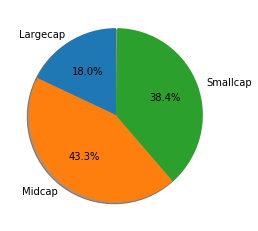

In [38]:
fig1, ax1 = plt.subplots()
ax1.pie(distribution.iloc[0,:].values, labels=distribution.columns, autopct='%1.1f%%',
        shadow=True, startangle=90);

`Note that Largcap is underrepresented in this distribution`

#### Plot this distribution as a bar chart. 

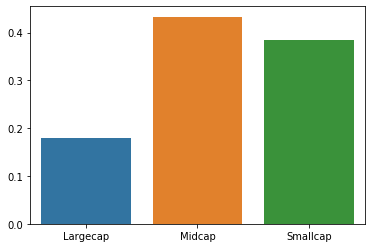

In [39]:
sns.barplot(distribution.columns, distribution.iloc[0,:].values)

`In the bar chart it becomes obvious that Largecap is underrepresented. `

#### Recreate first graph in Introduction

Text(0, 0.5, 'Company Density')

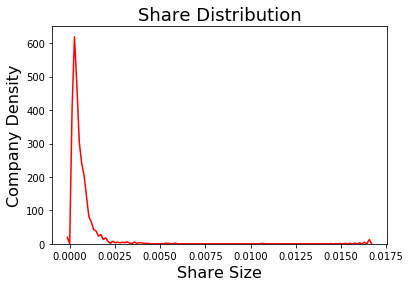

In [40]:
sns.distplot(short_list['total_share'], color = 'red', hist = False)
plt.title('Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Density', fontsize=16)

`The graph is mirrored on y=x if compared to the graph in the Introduction`

#### Draw the first 50 Largecap, first 50 Midcap, and first 50 Smallcap in a graph.

`Try to draw above graphes of Largcap, Midcap, Smallcap. If you intend to merge the graphs, the 
number of data points has to be the same. `

In [41]:
df_large50=short_list[0:50].copy()
df_mid50=short_list[50:100].copy()
df_small50=short_list[500:550].copy()
print(len(df_large), len(df_mid), len(df_small))

NameError: name 'df_large' is not defined

In [185]:
df_large['total_share']

0     0.037868
1     0.036963
2     0.024512
3     0.015548
4     0.013507
5     0.012933
6     0.012622
7     0.012300
8     0.012086
9     0.010128
10    0.009804
11    0.009294
12    0.008986
13    0.008973
14    0.008767
15    0.008435
16    0.008205
17    0.008195
18    0.007993
19    0.007498
20    0.007291
21    0.007173
22    0.006827
23    0.006720
24    0.006446
25    0.006427
26    0.006404
27    0.005999
28    0.005489
29    0.005483
30    0.005321
31    0.005025
32    0.004836
33    0.004787
34    0.004730
35    0.004685
36    0.004510
37    0.004464
38    0.004306
39    0.004265
40    0.004209
41    0.004167
42    0.004121
43    0.004101
44    0.004068
45    0.004068
46    0.003999
47    0.003982
48    0.003973
49    0.003951
Name: total_share, dtype: float64

Text(0, 0.5, 'Company Density')

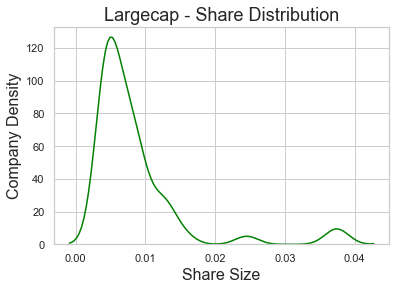

In [186]:
sns.distplot(df_large50['total_share'], color = 'green', hist = False)
plt.title('Largecap - Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Density', fontsize=16)

`Comment: There are only 50 companies in the data frame. Why does the count go to 400? 
Answer: The y-axis in a density plot is the probability density function for the kernel density estimation`
https://stackoverflow.com/questions/51666784/what-is-y-axis-in-seaborn-distplot#:~:text=and%20the%20y%20axis%20is,l%20with%203%20possible%20values.

Text(0, 0.5, 'Company Density')

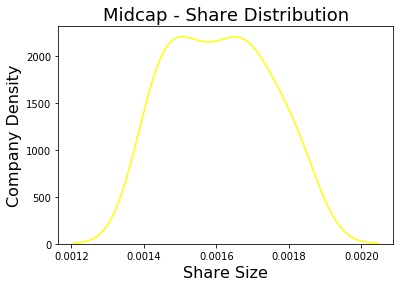

In [42]:
sns.distplot(df_mid50['total_share'], color = 'yellow', hist = False)
plt.title('Midcap - Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Density', fontsize=16)

Text(0, 0.5, 'Company Density')

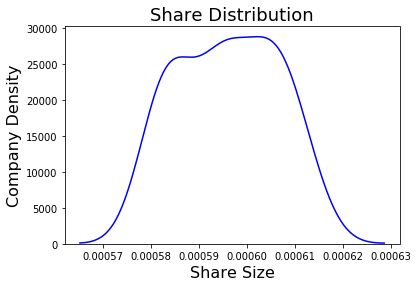

In [43]:
sns.distplot(df_small50['total_share'], color = 'blue', hist = False)
plt.title('Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Density', fontsize=16)

#### Create plots with the entire Largecap, Midcap, Smallcap

In [44]:
df_large=short_list[0:50].copy()
df_mid=short_list[50:500].copy()
df_small=short_list[500:].copy()
print(len(df_large), len(df_mid), len(df_small))

50 450 3581


Text(0, 0.5, 'Company Count')

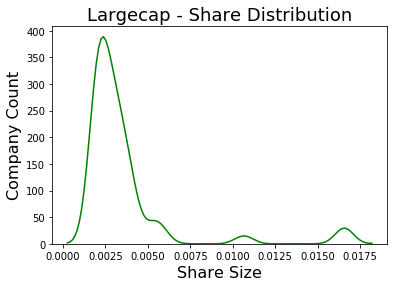

In [45]:
sns.distplot(df_large['total_share'], color = 'green', hist = False)
plt.title('Largecap - Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Count', fontsize=16)

Text(0, 0.5, 'Company Density')

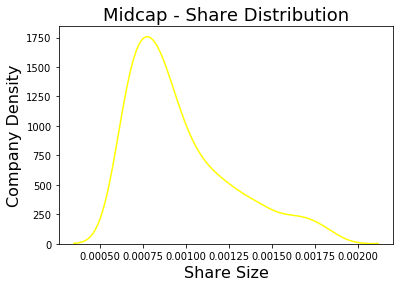

In [46]:
sns.distplot(df_mid['total_share'], color = 'yellow', hist = False)
plt.title('Midcap - Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Density', fontsize=16)

Text(0, 0.5, 'Company Density')

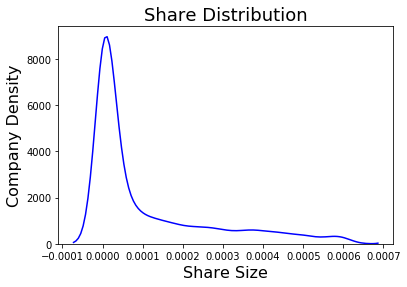

In [47]:
sns.distplot(df_small['total_share'], color = 'blue', hist = False)
plt.title('Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Density', fontsize=16)

### Question 2

Try some other proportions out in how you will divvy up your portfolio to get broader exposure to more mid and small size companies. Provide your best allocation and state the reasons why. This is a more open-ended question so be as creative as possible.

`Assumption: `
   - `The first 50 companies in the total etf mix are largecap companies`
   - `The next 450 (51-500) companies in the total etf mix are midcap companies`
   - `The remaining (501-eof) companides in the total etf mix are smallcap companies`

`Task:
    Find a mix where the largecap, midcap, and smallcap have an equal share of 33.3`

`Approach:`
- `start simple: use multiples of 10% for each etf`
- `create all etf permutations: 0, 0, 0, 0, 100 - 0, 0, 0, 10, 90, - 0, 0, 0, 20, 80 - .. `
- `Draw the pie chart and the bar chart for the best distributuion`

In [48]:
# Create the permutation for all ETF
limit=20
count=1
for i in range(limit+1):
    for j in range(limit+1):
        for k in range(limit+1):
            for l in range(limit+1):
                for m in range(limit+1):
                    if (i+j+k+l+m != limit):
                        continue
                    else:
                        #print(count, 'vti: ', i, 'j: ', j, 'k: ', k, 'l: ', l, 'm: ', m)
                        count+=1
print(count-1)                        
# count - permutation includes records:
# 1 - 5 
# 2 - 15   ->  
# 3 - 35   -> 
# 4 - 70
# 5 - 126 
# 6 - 210
# 10 - 1001
# 20 - 10626
# 50 > 1h
# A pentatope number is a number in the fifth cell of any row of Pascal's triangle 
# starting with the 5-term row 1 4 6 4 1 either from left to right or from right to left. 
# The first few numbers of this kind are: 1, 5, 15, 35, 70, 126, 210, 330, 495, 715, 1001, 1365 
# (sequence A000332 in the OEIS)
# https://en.wikipedia.org/wiki/Pentatope_number#:~:text=A%20pentatope%20number%20is%20a,sequence%20A000332%20in%20the%20OEIS)
    

10626


In [49]:
# Create a function to calculate the number pentalope
def pentalope(limit):
    count=1
    for i in range(limit+1):
        for j in range(limit+1):
            for k in range(limit+1):
                for l in range(limit+1):
                    for m in range(limit+1):
                        if (i+j+k+l+m != limit):
                            continue
                        else:
                            #print(count, 'vti: ', i, 'j: ', j, 'k: ', k, 'l: ', l, 'm: ', m)
                            count+=1
    return(count-1)

In [50]:
print(pentalope(20))

10626


In [51]:
limit=20  # 20 takes ca 10 minutes
cnt=0
for i in range(limit+1):
    for j in range(limit+1):
        for k in range(limit+1):
            for l in range(limit+1):
                for m in range(limit+1):
                    if (i+j+k+l+m != limit):
                        continue
                    else:
                        #print(cnt, 'i: ', i, 'j: ', j, 'k: ', k, 'l: ', l, 'm: ', m)
                        
                        # 1 create a copy of vti
                        df=vti.copy() 
                        df.rename(columns={"marketValue": "vti_marketValue"}, inplace = True)
                        df["vti_marketValue"]=i*df["vti_marketValue"]
                        
                        # 2 Merge vti with vo
                        df=df.merge(vo, how='outer')
                        df.rename(columns={"marketValue": "vo_marketValue"}, inplace = True)
                        df["vo_marketValue"]=j*df["vo_marketValue"]
                        
                        # 3 Merge vti, vo with vb
                        df=df.merge(vb, how='outer')
                        df.rename(columns={"marketValue": "vb_marketValue"}, inplace = True)
                        df["vb_marketValue"]=k*df["vb_marketValue"]
                        
                        # 4 Merge vti, vo, vb with voo
                        df=df.merge(voo, how='outer')
                        df.rename(columns={"marketValue": "voo_marketValue"}, inplace = True)
                        df["voo_marketValue"]=l*df["voo_marketValue"]
                        
                        # 5 Merge vti, vo, vb, voo with vxf
                        df=df.merge(vxf, how='outer')
                        df.rename(columns={"marketValue": "vxf_marketValue"}, inplace = True)
                        df["vxf_marketValue"]=m*df["vxf_marketValue"]
                        
                        # Replace NaN with 0.0
                        df['vti_marketValue']=df['vti_marketValue'].fillna(0.0)
                        df['vo_marketValue']=df['vo_marketValue'].fillna(0.0)
                        df['vb_marketValue']=df['vb_marketValue'].fillna(0.0)
                        df['voo_marketValue']=df['voo_marketValue'].fillna(0.0)
                        df['vxf_marketValue']=df['vxf_marketValue'].fillna(0.0)
                        
                        # Create marketValue column sum 
                        vti_sum=df['vti_marketValue'].sum(axis=0)
                        vo_sum= df['vo_marketValue' ].sum(axis=0)
                        vb_sum= df['vb_marketValue' ].sum(axis=0)
                        voo_sum=df['voo_marketValue'].sum(axis=0)
                        vxf_sum=df['vxf_marketValue'].sum(axis=0)
                        
                        # Create a new columns with the % of the total column value
                        df['vti_share']=df['vti_marketValue']/vti_sum
                        df['vo_share'] =df['vo_marketValue']/vo_sum
                        df['vb_share'] =df['vb_marketValue']/vb_sum
                        df['voo_share']=df['voo_marketValue']/voo_sum
                        df['vxf_share']=df['vxf_marketValue']/vxf_sum
                        
                        # The column sum might be 0 and creating a NaN in the *_marketValue column. Set it to 0
                        df['vti_share']=df['vti_share'].fillna(0.0)
                        df['vo_share']=df['vo_share'].fillna(0.0)
                        df['vb_share']=df['vb_share'].fillna(0.0)
                        df['voo_share']=df['voo_share'].fillna(0.0)
                        df['vxf_share']=df['vxf_share'].fillna(0.0)
                        
                        # Create a new columns with the % of the total column value
                        df['total_share'] = (i*df['vti_share'] + j*df['vo_share'] + k*df['vb_share'] + l*df['voo_share'] + m*df['vxf_share'])/limit
                        
                        # Create a data frame 'short_list' with just holding and tota_share. Sort it by total_share inplace. 
                        short_list=df.loc[:,['holding', 'total_share']]
                        short_list.sort_values(by = 'total_share', ascending = False, inplace = True)
                        
                        # Calculate the largecap, midcap, and smallcap sum
                        largecap=short_list[0:50]['total_share'].sum()
                        midcap=short_list[51:500]['total_share'].sum()
                        smallcap=short_list[501:]['total_share'].sum()
                        #print(largecap, midcap, smallcap, i, j, k, l, m)
                        if(cnt==0):
                            distribution=pd.DataFrame(columns=['Largecap', 'Midcap', 'Smallcap', 'vti_factor', 'vo_factor', 'vb_factor', 'voo_factor', 'vxf_factor'], index = range(pentalope(limit)))
                        distribution.iloc[cnt,:]=[largecap, midcap, smallcap, i, j, k, l, m]
                        #distribution.iloc[0,:]=[largecap, midcap, smallcap]
                        
                        cnt+=1
                        
#df
#short_list
print(pentalope(limit))
# although pentalope(10)=1001 and distribution=pd.Dataframe should create only 1001 lines, it creates 4081
distribution.dropna(axis=0, inplace=True)
distribution

10626


,Largecap,Midcap,Smallcap,vti_factor,vo_factor,vb_factor,voo_factor,vxf_factor
0,0.156787,0.47922,0.361297,0,0,0,0,20
1,0.149509,0.460044,0.387847,0,0,0,1,19
2,0.147385,0.448163,0.401945,0,0,0,2,18
3,0.148794,0.440733,0.407977,0,0,0,3,17
4,0.1548,0.433759,0.408915,0,0,0,4,16
...,...,...,...,...,...,...,...,...
10621,0.40512,0.410853,0.180105,19,0,0,0,1
10622,0.42644,0.425387,0.144071,19,0,0,1,0
10623,0.40512,0.40678,0.184179,19,0,1,0,0
10624,0.40512,0.442466,0.148479,19,1,0,0,0


In [52]:
# find factor combination closest to 1/3 largecap, 1/3, midcap, 1/3 smallcapp
# How: create another column with the standard deviation of Largecap, Midcap, Smallcap. 
# Where STD is the lowest, is the number closest to 3 x 1/3. 

distribution['std']=distribution[['Largecap', 'Midcap', 'Smallcap']].std(axis=1)
distribution['std'].min()

0.039340203324143355

In [53]:
distribution.loc[distribution['std'] == distribution['std'].min()]
#10: 973	0.298509	0.375486	0.322893	7	0	2	0	1	0.03934
#20: 10438	0.298509	0.375486	0.322893	14	0	4	0	2	0.03934

,Largecap,Midcap,Smallcap,vti_factor,vo_factor,vb_factor,voo_factor,vxf_factor,std
10438,0.298509,0.375486,0.322893,14,0,4,0,2,0.03934


`Find the 10 smallest distributions`

In [54]:
distribution['std'].nsmallest(10)

10438    0.039340
10323    0.039468
10434    0.039815
90       0.039962
10318    0.039993
10441    0.040268
10518    0.040360
10515    0.040560
10327    0.040563
1856     0.040925
Name: std, dtype: float64

`Show the complete rows of the 10 best distributions`

In [55]:
distribution.loc[distribution['std'] < 0.041 ].sort_values('std')

,Largecap,Midcap,Smallcap,vti_factor,vo_factor,vb_factor,voo_factor,vxf_factor,std
10438,0.298509,0.375486,0.322893,14,0,4,0,2,0.039340
10323,0.298567,0.375698,0.322595,13,0,4,1,2,0.039468
10434,0.298777,0.376284,0.32171,14,0,3,0,3,0.039815
90,0.305744,0.378231,0.312832,0,0,4,12,4,0.039962
10318,0.298828,0.376581,0.321452,13,0,3,1,3,0.039993
10441,0.298509,0.376854,0.321521,14,0,5,0,1,0.040268
10518,0.319831,0.377349,0.299544,15,0,4,0,1,0.040360
10515,0.319831,0.377558,0.299338,15,0,3,0,2,0.040560
10327,0.298567,0.377299,0.320991,13,0,5,1,1,0.040563
1856,0.298146,0.377656,0.321075,1,0,4,11,4,0.040925


`From above table we see that VO does not play a role. Above table was generated using 1/20th as fraction. E.g. the first line means: `
- `14/20 vti, 0/20 vo, 4/20 vb, 0/20 voo, 2/20 vxf `

#### Plot the best distribution as a pie chart

In [56]:
distribution.columns[0:3]

Index(['Largecap', 'Midcap', 'Smallcap'], dtype='object')

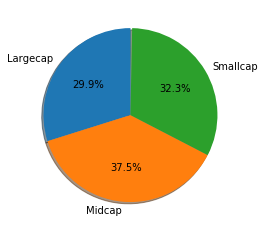

In [58]:
fig1, ax1 = plt.subplots()
ax1.pie(distribution.iloc[10438,0:3].values, labels=distribution.columns[0:3], autopct='%1.1f%%',
        shadow=True, startangle=90);

`Note that visually this distribution looks equally distributed among Largcap, Midcap, and Smallcap`

#### Plot the best distribution as bar chart

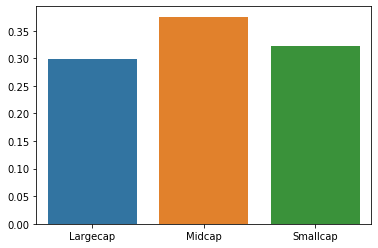

In [59]:
sns.barplot(distribution.columns[0:3], distribution.iloc[10438,0:3].values)